In [1]:
         #collect data

import pandas as pd #collect data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math

UsageError: Line magic function `%` not found.


In [2]:
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
print("total passenger:" +str(len(titanic_data.index)))

total passenger:887


# analyzing  data  creating various plot to check the relationship b/w variable
    

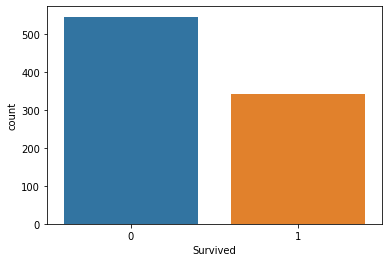

In [4]:
sns.countplot(x ="Survived",data=titanic_data)

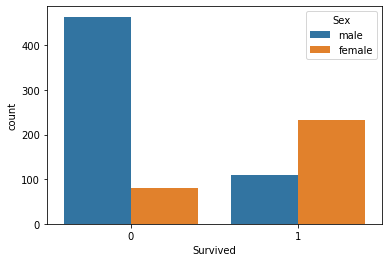

In [5]:
sns.countplot(x ="Survived", hue="Sex",data=titanic_data)

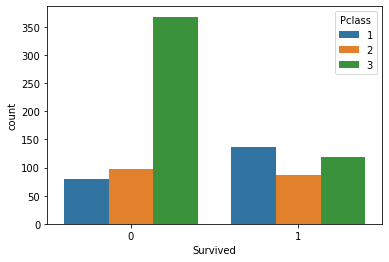

In [6]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

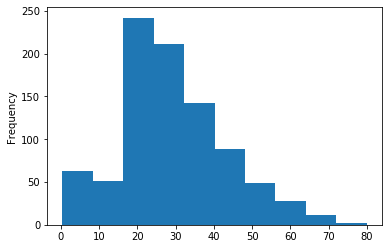

In [7]:
titanic_data["Age"].plot.hist()

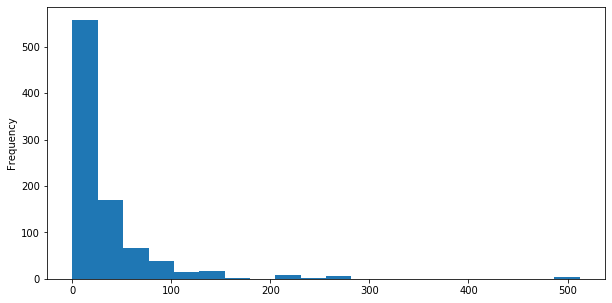

In [8]:
titanic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


# data wrangling ===> Clean the data by removing the null value and unnecessary column in dataset

In [13]:
titanic_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [15]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

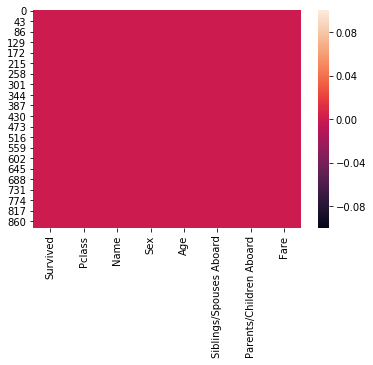

In [49]:
sns.heatmap(titanic_data.isnull())

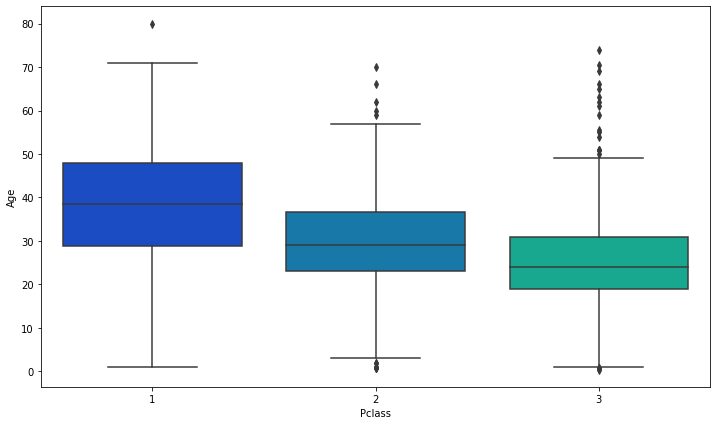

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,palette='winter')

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [58]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)

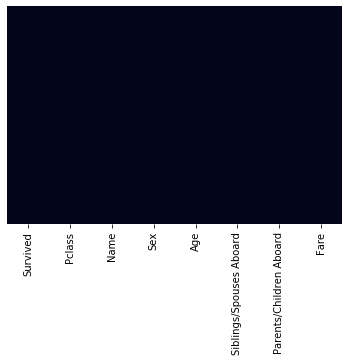

In [60]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)


In [65]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_data['Name'],drop_first=True)


In [67]:
titanic_data.drop(['Sex','Name'],axis=1,inplace=True)

In [68]:
titanic_data = pd.concat([titanic_data,sex],axis=1)

# Train data

In [135]:
X=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [136]:
from sklearn.model_selection import train_test_split 

In [137]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_reg= LogisticRegression()

In [140]:
log_reg.fit(X_train,y_train)

C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [142]:
from sklearn.metrics import classification_report

In [116]:
classification_report(y_test,predictions)

NameError: name 'predictions' is not defined

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test,predictions)

NameError: name 'predictions' is not defined

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test,predictions)

NameError: name 'predictions' is not defined